In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, InputLayer
from keras.optimizers import Adadelta, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from config import *

In [2]:
df = pd.read_excel(filename_all)

df['Date']  = pd.to_datetime(df['Date'], format = '%d/%m/%Y')

# Month
df['Month']  = df['Date'].dt.strftime('%m')
df['Month'] = df['Month'].apply(lambda x: int(x))

# Day
df['Day'] = df['Date'].dt.strftime('%d')
df['Day'] = df['Day'].apply(lambda x: int(x))

# Week
df['Week']  = df['Date'].dt.isocalendar().week
df['Week'] = df['Week'].apply(lambda x: int(x))

df['week_cos'] = np.cos(2 * np.pi * df['Week'] / 7)
df['week_sin'] = np.sin(2 * np.pi * df['Week'] / 7)

df['month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)

df['day_cos'] = np.cos(2 * np.pi * df['Day'] / 31)
df['day_sin'] = np.sin(2 * np.pi * df['Day'] / 31)

In [3]:
df = df[['Day_Name', 'month_cos', 'month_sin', 'first']]

labelencoder = LabelEncoder()
df['Day_Name'] = labelencoder.fit_transform(df['Day_Name'])

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(df[['Day_Name']]).toarray())
ohe_df.columns = ohe.get_feature_names()
ohe_df = ohe_df.astype(int)

df = df.join(ohe_df)

output = len(df['first'].unique())

In [4]:
df.head()

,Day_Name,month_cos,month_sin,first,x0_0,x0_1,x0_2,x0_3
0,2,6.123234e-17,1.0,12,0,0,1,0
1,0,6.123234e-17,1.0,2,1,0,0,0
2,1,6.123234e-17,1.0,1,0,1,0,0
3,2,6.123234e-17,1.0,15,0,0,1,0
4,0,6.123234e-17,1.0,4,1,0,0,0


In [5]:
X = df.drop(['first', 'Day_Name'], axis = 1)
y = df['first']
y = y.to_numpy()

scaler  = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoded_Y)

X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = test_size, random_state = rand_state)

In [12]:
#def baseline_model():
model = Sequential()
model.add(InputLayer(input_shape=(X_train.shape[1], )))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(125, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(output, activation='softmax'))

optimizer = Adadelta(learning_rate=0.001, rho = 0.95, epsilon = 1e-07)
    
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 4500, verbose = 1, validation_data = (X_test, y_test))

#prediction_test = model.predict(X_test)



    #return model

#estimator = KerasClassifier(build_fn=baseline_model, epochs=2000, batch_size=10, verbose=1)
#kfold = KFold(n_splits=10, shuffle=True)
#results = cross_val_score(estimator, X, dummy_y, cv=kfold)


Epoch 1/4500
58/58 [==============================] - 1s 5ms/step - loss: 3.2677 - accuracy: 0.0546 - val_loss: 3.2544 - val_accuracy: 0.0800
Epoch 2/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2751 - accuracy: 0.0530 - val_loss: 3.2538 - val_accuracy: 0.0800
Epoch 3/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2676 - accuracy: 0.0553 - val_loss: 3.2533 - val_accuracy: 0.0831
Epoch 4/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2634 - accuracy: 0.0685 - val_loss: 3.2528 - val_accuracy: 0.0831
Epoch 5/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2663 - accuracy: 0.0599 - val_loss: 3.2522 - val_accuracy: 0.0831
Epoch 6/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2732 - accuracy: 0.0478 - val_loss: 3.2517 - val_accuracy: 0.0831
Epoch 7/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2647 - accuracy: 0.0601 - val_loss: 3.2512 - val_accuracy: 0.0831
Epoch 

58/58 [==============================] - 0s 1ms/step - loss: 3.2486 - accuracy: 0.0651 - val_loss: 3.2228 - val_accuracy: 0.0923
Epoch 59/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2397 - accuracy: 0.0625 - val_loss: 3.2222 - val_accuracy: 0.0923
Epoch 60/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2474 - accuracy: 0.0606 - val_loss: 3.2217 - val_accuracy: 0.0923
Epoch 61/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2411 - accuracy: 0.0737 - val_loss: 3.2211 - val_accuracy: 0.0923
Epoch 62/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2331 - accuracy: 0.0691 - val_loss: 3.2205 - val_accuracy: 0.0923
Epoch 63/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2315 - accuracy: 0.0773 - val_loss: 3.2200 - val_accuracy: 0.0923
Epoch 64/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2270 - accuracy: 0.0749 - val_loss: 3.2194 - val_accuracy: 0.0923
Epoch 65/4500

58/58 [==============================] - 0s 2ms/step - loss: 3.2151 - accuracy: 0.0697 - val_loss: 3.1909 - val_accuracy: 0.0954
Epoch 116/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2065 - accuracy: 0.0625 - val_loss: 3.1904 - val_accuracy: 0.0954
Epoch 117/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2151 - accuracy: 0.0865 - val_loss: 3.1898 - val_accuracy: 0.0954
Epoch 118/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2070 - accuracy: 0.0752 - val_loss: 3.1893 - val_accuracy: 0.0954
Epoch 119/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2026 - accuracy: 0.0854 - val_loss: 3.1887 - val_accuracy: 0.0954
Epoch 120/4500
58/58 [==============================] - 0s 1ms/step - loss: 3.2119 - accuracy: 0.0720 - val_loss: 3.1882 - val_accuracy: 0.0954
Epoch 121/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.2082 - accuracy: 0.0834 - val_loss: 3.1876 - val_accuracy: 0.0954
Epoch 1

Epoch 172/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1845 - accuracy: 0.0785 - val_loss: 3.1603 - val_accuracy: 0.0923
Epoch 173/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1849 - accuracy: 0.0870 - val_loss: 3.1598 - val_accuracy: 0.0923
Epoch 174/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1836 - accuracy: 0.0968 - val_loss: 3.1593 - val_accuracy: 0.0923
Epoch 175/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1799 - accuracy: 0.0824 - val_loss: 3.1587 - val_accuracy: 0.0923
Epoch 176/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1858 - accuracy: 0.0766 - val_loss: 3.1582 - val_accuracy: 0.0923
Epoch 177/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1652 - accuracy: 0.1078 - val_loss: 3.1577 - val_accuracy: 0.0923
Epoch 178/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1855 - accuracy: 0.0931 - val_loss: 3.1572 - val_accuracy:

Epoch 229/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1469 - accuracy: 0.1003 - val_loss: 3.1311 - val_accuracy: 0.0954
Epoch 230/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1620 - accuracy: 0.0922 - val_loss: 3.1306 - val_accuracy: 0.0954
Epoch 231/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1501 - accuracy: 0.0950 - val_loss: 3.1301 - val_accuracy: 0.0954
Epoch 232/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1416 - accuracy: 0.1010 - val_loss: 3.1296 - val_accuracy: 0.0954
Epoch 233/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1443 - accuracy: 0.0988 - val_loss: 3.1291 - val_accuracy: 0.0954
Epoch 234/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1591 - accuracy: 0.0926 - val_loss: 3.1286 - val_accuracy: 0.0954
Epoch 235/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1568 - accuracy: 0.1070 - val_loss: 3.1281 - val_accuracy:

Epoch 286/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1333 - accuracy: 0.0945 - val_loss: 3.1032 - val_accuracy: 0.1231
Epoch 287/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1309 - accuracy: 0.0825 - val_loss: 3.1028 - val_accuracy: 0.1231
Epoch 288/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1277 - accuracy: 0.1058 - val_loss: 3.1023 - val_accuracy: 0.1231
Epoch 289/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1332 - accuracy: 0.1029 - val_loss: 3.1018 - val_accuracy: 0.1231
Epoch 290/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1189 - accuracy: 0.1149 - val_loss: 3.1013 - val_accuracy: 0.1231
Epoch 291/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1237 - accuracy: 0.1105 - val_loss: 3.1009 - val_accuracy: 0.1231
Epoch 292/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1376 - accuracy: 0.1056 - val_loss: 3.1004 - val_accuracy:

Epoch 343/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1000 - accuracy: 0.1107 - val_loss: 3.0767 - val_accuracy: 0.1292
Epoch 344/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1099 - accuracy: 0.1129 - val_loss: 3.0762 - val_accuracy: 0.1292
Epoch 345/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1186 - accuracy: 0.0895 - val_loss: 3.0758 - val_accuracy: 0.1292
Epoch 346/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1042 - accuracy: 0.1063 - val_loss: 3.0753 - val_accuracy: 0.1292
Epoch 347/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1078 - accuracy: 0.1008 - val_loss: 3.0749 - val_accuracy: 0.1292
Epoch 348/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0970 - accuracy: 0.1140 - val_loss: 3.0744 - val_accuracy: 0.1292
Epoch 349/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.1071 - accuracy: 0.1026 - val_loss: 3.0740 - val_accuracy:

58/58 [==============================] - 0s 2ms/step - loss: 3.0761 - accuracy: 0.1102 - val_loss: 3.0517 - val_accuracy: 0.1292
Epoch 400/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0846 - accuracy: 0.1061 - val_loss: 3.0513 - val_accuracy: 0.1292
Epoch 401/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0842 - accuracy: 0.1103 - val_loss: 3.0508 - val_accuracy: 0.1292
Epoch 402/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0821 - accuracy: 0.1105 - val_loss: 3.0504 - val_accuracy: 0.1292
Epoch 403/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0678 - accuracy: 0.1078 - val_loss: 3.0499 - val_accuracy: 0.1292
Epoch 404/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0776 - accuracy: 0.1089 - val_loss: 3.0495 - val_accuracy: 0.1292
Epoch 405/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0821 - accuracy: 0.1089 - val_loss: 3.0491 - val_accuracy: 0.1292
Epoch 4

Epoch 456/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0536 - accuracy: 0.1129 - val_loss: 3.0274 - val_accuracy: 0.1385
Epoch 457/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0591 - accuracy: 0.1113 - val_loss: 3.0269 - val_accuracy: 0.1385
Epoch 458/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0638 - accuracy: 0.1216 - val_loss: 3.0265 - val_accuracy: 0.1385
Epoch 459/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0495 - accuracy: 0.1054 - val_loss: 3.0261 - val_accuracy: 0.1385
Epoch 460/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0444 - accuracy: 0.1304 - val_loss: 3.0257 - val_accuracy: 0.1385
Epoch 461/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0496 - accuracy: 0.1164 - val_loss: 3.0253 - val_accuracy: 0.1385
Epoch 462/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0645 - accuracy: 0.1064 - val_loss: 3.0249 - val_accuracy:

Epoch 513/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0490 - accuracy: 0.1037 - val_loss: 3.0044 - val_accuracy: 0.1292
Epoch 514/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0331 - accuracy: 0.1182 - val_loss: 3.0040 - val_accuracy: 0.1292
Epoch 515/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0433 - accuracy: 0.0973 - val_loss: 3.0036 - val_accuracy: 0.1292
Epoch 516/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0358 - accuracy: 0.1067 - val_loss: 3.0032 - val_accuracy: 0.1292
Epoch 517/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0411 - accuracy: 0.1081 - val_loss: 3.0028 - val_accuracy: 0.1292
Epoch 518/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0228 - accuracy: 0.1400 - val_loss: 3.0025 - val_accuracy: 0.1292
Epoch 519/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0273 - accuracy: 0.1242 - val_loss: 3.0021 - val_accuracy:

Epoch 570/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0245 - accuracy: 0.1123 - val_loss: 2.9826 - val_accuracy: 0.1292
Epoch 571/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0151 - accuracy: 0.1115 - val_loss: 2.9823 - val_accuracy: 0.1292
Epoch 572/4500
58/58 [==============================] - 0s 1ms/step - loss: 3.0178 - accuracy: 0.1154 - val_loss: 2.9819 - val_accuracy: 0.1292
Epoch 573/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0217 - accuracy: 0.1063 - val_loss: 2.9815 - val_accuracy: 0.1292
Epoch 574/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0135 - accuracy: 0.1187 - val_loss: 2.9812 - val_accuracy: 0.1292
Epoch 575/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0092 - accuracy: 0.1119 - val_loss: 2.9808 - val_accuracy: 0.1292
Epoch 576/4500
58/58 [==============================] - 0s 2ms/step - loss: 3.0104 - accuracy: 0.1172 - val_loss: 2.9804 - val_accuracy:

Epoch 627/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9866 - accuracy: 0.1447 - val_loss: 2.9620 - val_accuracy: 0.1292
Epoch 628/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9934 - accuracy: 0.1379 - val_loss: 2.9617 - val_accuracy: 0.1292
Epoch 629/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9704 - accuracy: 0.1578 - val_loss: 2.9613 - val_accuracy: 0.1292
Epoch 630/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9859 - accuracy: 0.1366 - val_loss: 2.9610 - val_accuracy: 0.1292
Epoch 631/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9881 - accuracy: 0.1174 - val_loss: 2.9606 - val_accuracy: 0.1292
Epoch 632/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9907 - accuracy: 0.1196 - val_loss: 2.9603 - val_accuracy: 0.1292
Epoch 633/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9791 - accuracy: 0.1177 - val_loss: 2.9599 - val_accuracy:

Epoch 684/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9688 - accuracy: 0.1389 - val_loss: 2.9427 - val_accuracy: 0.1292
Epoch 685/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9717 - accuracy: 0.1362 - val_loss: 2.9424 - val_accuracy: 0.1292
Epoch 686/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9771 - accuracy: 0.1256 - val_loss: 2.9420 - val_accuracy: 0.1292
Epoch 687/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9855 - accuracy: 0.1120 - val_loss: 2.9417 - val_accuracy: 0.1292
Epoch 688/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9669 - accuracy: 0.1330 - val_loss: 2.9414 - val_accuracy: 0.1292
Epoch 689/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9760 - accuracy: 0.1219 - val_loss: 2.9410 - val_accuracy: 0.1292
Epoch 690/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9719 - accuracy: 0.1190 - val_loss: 2.9407 - val_accuracy:

Epoch 741/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9709 - accuracy: 0.1280 - val_loss: 2.9244 - val_accuracy: 0.1292
Epoch 742/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9532 - accuracy: 0.1327 - val_loss: 2.9241 - val_accuracy: 0.1292
Epoch 743/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9792 - accuracy: 0.1301 - val_loss: 2.9238 - val_accuracy: 0.1292
Epoch 744/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9635 - accuracy: 0.1222 - val_loss: 2.9235 - val_accuracy: 0.1292
Epoch 745/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9477 - accuracy: 0.1308 - val_loss: 2.9232 - val_accuracy: 0.1292
Epoch 746/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9497 - accuracy: 0.1511 - val_loss: 2.9229 - val_accuracy: 0.1292
Epoch 747/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9593 - accuracy: 0.1182 - val_loss: 2.9226 - val_accuracy:

Epoch 798/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9476 - accuracy: 0.1210 - val_loss: 2.9073 - val_accuracy: 0.1292
Epoch 799/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9406 - accuracy: 0.1216 - val_loss: 2.9070 - val_accuracy: 0.1292
Epoch 800/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9547 - accuracy: 0.1181 - val_loss: 2.9067 - val_accuracy: 0.1292
Epoch 801/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9392 - accuracy: 0.1294 - val_loss: 2.9064 - val_accuracy: 0.1292
Epoch 802/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9579 - accuracy: 0.1200 - val_loss: 2.9061 - val_accuracy: 0.1292
Epoch 803/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9508 - accuracy: 0.1174 - val_loss: 2.9058 - val_accuracy: 0.1292
Epoch 804/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9474 - accuracy: 0.1367 - val_loss: 2.9055 - val_accuracy:

Epoch 855/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9411 - accuracy: 0.1319 - val_loss: 2.8911 - val_accuracy: 0.1292
Epoch 856/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.9251 - accuracy: 0.1239 - val_loss: 2.8908 - val_accuracy: 0.1292
Epoch 857/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9268 - accuracy: 0.1347 - val_loss: 2.8906 - val_accuracy: 0.1323
Epoch 858/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9158 - accuracy: 0.1228 - val_loss: 2.8903 - val_accuracy: 0.1354
Epoch 859/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9163 - accuracy: 0.1385 - val_loss: 2.8900 - val_accuracy: 0.1354
Epoch 860/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9153 - accuracy: 0.1311 - val_loss: 2.8897 - val_accuracy: 0.1354
Epoch 861/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9316 - accuracy: 0.1300 - val_loss: 2.8895 - val_accuracy:

Epoch 912/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9128 - accuracy: 0.1338 - val_loss: 2.8760 - val_accuracy: 0.1354
Epoch 913/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9351 - accuracy: 0.1040 - val_loss: 2.8757 - val_accuracy: 0.1354
Epoch 914/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9176 - accuracy: 0.1325 - val_loss: 2.8755 - val_accuracy: 0.1354
Epoch 915/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9197 - accuracy: 0.1362 - val_loss: 2.8752 - val_accuracy: 0.1354
Epoch 916/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9262 - accuracy: 0.1107 - val_loss: 2.8750 - val_accuracy: 0.1354
Epoch 917/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9154 - accuracy: 0.1290 - val_loss: 2.8747 - val_accuracy: 0.1354
Epoch 918/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9117 - accuracy: 0.1407 - val_loss: 2.8745 - val_accuracy:

Epoch 969/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9046 - accuracy: 0.1175 - val_loss: 2.8620 - val_accuracy: 0.1354
Epoch 970/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9064 - accuracy: 0.1236 - val_loss: 2.8618 - val_accuracy: 0.1354
Epoch 971/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9007 - accuracy: 0.1377 - val_loss: 2.8615 - val_accuracy: 0.1354
Epoch 972/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9007 - accuracy: 0.1377 - val_loss: 2.8613 - val_accuracy: 0.1354
Epoch 973/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9020 - accuracy: 0.1275 - val_loss: 2.8611 - val_accuracy: 0.1354
Epoch 974/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8957 - accuracy: 0.1370 - val_loss: 2.8608 - val_accuracy: 0.1354
Epoch 975/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9100 - accuracy: 0.1040 - val_loss: 2.8606 - val_accuracy:

Epoch 1026/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8934 - accuracy: 0.1279 - val_loss: 2.8491 - val_accuracy: 0.1385
Epoch 1027/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8867 - accuracy: 0.1339 - val_loss: 2.8488 - val_accuracy: 0.1385
Epoch 1028/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8809 - accuracy: 0.1398 - val_loss: 2.8486 - val_accuracy: 0.1385
Epoch 1029/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.9021 - accuracy: 0.1290 - val_loss: 2.8484 - val_accuracy: 0.1385
Epoch 1030/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8930 - accuracy: 0.1237 - val_loss: 2.8482 - val_accuracy: 0.1385
Epoch 1031/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8863 - accuracy: 0.1227 - val_loss: 2.8480 - val_accuracy: 0.1385
Epoch 1032/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8820 - accuracy: 0.1348 - val_loss: 2.8477 - val_ac

58/58 [==============================] - 0s 2ms/step - loss: 2.8711 - accuracy: 0.1402 - val_loss: 2.8373 - val_accuracy: 0.1385
Epoch 1083/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8599 - accuracy: 0.1402 - val_loss: 2.8371 - val_accuracy: 0.1385
Epoch 1084/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8958 - accuracy: 0.1310 - val_loss: 2.8369 - val_accuracy: 0.1385
Epoch 1085/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8906 - accuracy: 0.1152 - val_loss: 2.8367 - val_accuracy: 0.1385
Epoch 1086/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8827 - accuracy: 0.1281 - val_loss: 2.8365 - val_accuracy: 0.1385
Epoch 1087/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8988 - accuracy: 0.1205 - val_loss: 2.8363 - val_accuracy: 0.1385
Epoch 1088/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8843 - accuracy: 0.1229 - val_loss: 2.8361 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8745 - accuracy: 0.1102 - val_loss: 2.8265 - val_accuracy: 0.1385
Epoch 1139/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8720 - accuracy: 0.1335 - val_loss: 2.8263 - val_accuracy: 0.1385
Epoch 1140/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8468 - accuracy: 0.1361 - val_loss: 2.8261 - val_accuracy: 0.1385
Epoch 1141/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8594 - accuracy: 0.1442 - val_loss: 2.8259 - val_accuracy: 0.1385
Epoch 1142/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8846 - accuracy: 0.1248 - val_loss: 2.8258 - val_accuracy: 0.1446
Epoch 1143/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8877 - accuracy: 0.1203 - val_loss: 2.8256 - val_accuracy: 0.1446
Epoch 1144/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.8681 - accuracy: 0.1345 - val_loss: 2.8254 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8396 - accuracy: 0.1393 - val_loss: 2.8165 - val_accuracy: 0.1446
Epoch 1195/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8483 - accuracy: 0.1395 - val_loss: 2.8164 - val_accuracy: 0.1446
Epoch 1196/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8697 - accuracy: 0.1177 - val_loss: 2.8162 - val_accuracy: 0.1446
Epoch 1197/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8563 - accuracy: 0.1258 - val_loss: 2.8160 - val_accuracy: 0.1446
Epoch 1198/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8603 - accuracy: 0.1250 - val_loss: 2.8159 - val_accuracy: 0.1446
Epoch 1199/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8700 - accuracy: 0.1247 - val_loss: 2.8157 - val_accuracy: 0.1446
Epoch 1200/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8614 - accuracy: 0.1183 - val_loss: 2.8155 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8466 - accuracy: 0.1260 - val_loss: 2.8074 - val_accuracy: 0.1446
Epoch 1251/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8654 - accuracy: 0.1152 - val_loss: 2.8072 - val_accuracy: 0.1446
Epoch 1252/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8569 - accuracy: 0.1207 - val_loss: 2.8071 - val_accuracy: 0.1446
Epoch 1253/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8666 - accuracy: 0.1236 - val_loss: 2.8069 - val_accuracy: 0.1446
Epoch 1254/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8440 - accuracy: 0.1262 - val_loss: 2.8068 - val_accuracy: 0.1446
Epoch 1255/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8637 - accuracy: 0.1296 - val_loss: 2.8066 - val_accuracy: 0.1446
Epoch 1256/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8564 - accuracy: 0.1339 - val_loss: 2.8065 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8569 - accuracy: 0.1205 - val_loss: 2.7991 - val_accuracy: 0.1446
Epoch 1307/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8523 - accuracy: 0.1274 - val_loss: 2.7989 - val_accuracy: 0.1446
Epoch 1308/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8708 - accuracy: 0.1236 - val_loss: 2.7988 - val_accuracy: 0.1446
Epoch 1309/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8465 - accuracy: 0.1384 - val_loss: 2.7986 - val_accuracy: 0.1446
Epoch 1310/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8394 - accuracy: 0.1381 - val_loss: 2.7985 - val_accuracy: 0.1446
Epoch 1311/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8425 - accuracy: 0.1338 - val_loss: 2.7984 - val_accuracy: 0.1446
Epoch 1312/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8446 - accuracy: 0.1330 - val_loss: 2.7982 - val_accuracy: 0.1446
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8654 - accuracy: 0.1448 - val_loss: 2.7914 - val_accuracy: 0.1415
Epoch 1363/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8482 - accuracy: 0.1162 - val_loss: 2.7913 - val_accuracy: 0.1415
Epoch 1364/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8335 - accuracy: 0.1439 - val_loss: 2.7911 - val_accuracy: 0.1415
Epoch 1365/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8347 - accuracy: 0.1370 - val_loss: 2.7910 - val_accuracy: 0.1415
Epoch 1366/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8488 - accuracy: 0.1306 - val_loss: 2.7909 - val_accuracy: 0.1415
Epoch 1367/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8350 - accuracy: 0.1204 - val_loss: 2.7908 - val_accuracy: 0.1415
Epoch 1368/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8593 - accuracy: 0.1361 - val_loss: 2.7906 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8313 - accuracy: 0.1207 - val_loss: 2.7843 - val_accuracy: 0.1446
Epoch 1419/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8451 - accuracy: 0.1202 - val_loss: 2.7842 - val_accuracy: 0.1446
Epoch 1420/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8272 - accuracy: 0.1347 - val_loss: 2.7841 - val_accuracy: 0.1385
Epoch 1421/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8243 - accuracy: 0.1349 - val_loss: 2.7839 - val_accuracy: 0.1385
Epoch 1422/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8158 - accuracy: 0.1382 - val_loss: 2.7838 - val_accuracy: 0.1385
Epoch 1423/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8436 - accuracy: 0.1256 - val_loss: 2.7837 - val_accuracy: 0.1385
Epoch 1424/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8407 - accuracy: 0.1369 - val_loss: 2.7836 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8249 - accuracy: 0.1161 - val_loss: 2.7778 - val_accuracy: 0.1385
Epoch 1475/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8313 - accuracy: 0.1268 - val_loss: 2.7777 - val_accuracy: 0.1385
Epoch 1476/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8065 - accuracy: 0.1571 - val_loss: 2.7776 - val_accuracy: 0.1385
Epoch 1477/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8470 - accuracy: 0.1158 - val_loss: 2.7775 - val_accuracy: 0.1385
Epoch 1478/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.8338 - accuracy: 0.1402 - val_loss: 2.7774 - val_accuracy: 0.1385
Epoch 1479/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8482 - accuracy: 0.1213 - val_loss: 2.7773 - val_accuracy: 0.1385
Epoch 1480/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8031 - accuracy: 0.1459 - val_loss: 2.7772 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8357 - accuracy: 0.1217 - val_loss: 2.7718 - val_accuracy: 0.1385
Epoch 1531/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8185 - accuracy: 0.1440 - val_loss: 2.7717 - val_accuracy: 0.1385
Epoch 1532/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8174 - accuracy: 0.1334 - val_loss: 2.7716 - val_accuracy: 0.1385
Epoch 1533/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7917 - accuracy: 0.1448 - val_loss: 2.7715 - val_accuracy: 0.1385
Epoch 1534/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8106 - accuracy: 0.1460 - val_loss: 2.7714 - val_accuracy: 0.1385
Epoch 1535/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8251 - accuracy: 0.1223 - val_loss: 2.7713 - val_accuracy: 0.1385
Epoch 1536/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8065 - accuracy: 0.1413 - val_loss: 2.7712 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8336 - accuracy: 0.1320 - val_loss: 2.7664 - val_accuracy: 0.1323
Epoch 1587/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8186 - accuracy: 0.1302 - val_loss: 2.7663 - val_accuracy: 0.1323
Epoch 1588/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8247 - accuracy: 0.1295 - val_loss: 2.7662 - val_accuracy: 0.1323
Epoch 1589/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8047 - accuracy: 0.1427 - val_loss: 2.7661 - val_accuracy: 0.1323
Epoch 1590/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7829 - accuracy: 0.1394 - val_loss: 2.7660 - val_accuracy: 0.1323
Epoch 1591/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8310 - accuracy: 0.1442 - val_loss: 2.7659 - val_accuracy: 0.1323
Epoch 1592/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8270 - accuracy: 0.1262 - val_loss: 2.7658 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8048 - accuracy: 0.1398 - val_loss: 2.7613 - val_accuracy: 0.1262
Epoch 1643/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8178 - accuracy: 0.1354 - val_loss: 2.7612 - val_accuracy: 0.1262
Epoch 1644/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8333 - accuracy: 0.1120 - val_loss: 2.7612 - val_accuracy: 0.1262
Epoch 1645/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8295 - accuracy: 0.1240 - val_loss: 2.7611 - val_accuracy: 0.1262
Epoch 1646/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8134 - accuracy: 0.1165 - val_loss: 2.7610 - val_accuracy: 0.1262
Epoch 1647/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8120 - accuracy: 0.1393 - val_loss: 2.7609 - val_accuracy: 0.1262
Epoch 1648/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8146 - accuracy: 0.1241 - val_loss: 2.7608 - val_accuracy: 0.1262
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8204 - accuracy: 0.1375 - val_loss: 2.7567 - val_accuracy: 0.1292
Epoch 1699/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8286 - accuracy: 0.1252 - val_loss: 2.7566 - val_accuracy: 0.1292
Epoch 1700/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8119 - accuracy: 0.1275 - val_loss: 2.7565 - val_accuracy: 0.1292
Epoch 1701/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7930 - accuracy: 0.1375 - val_loss: 2.7565 - val_accuracy: 0.1292
Epoch 1702/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8028 - accuracy: 0.1393 - val_loss: 2.7564 - val_accuracy: 0.1292
Epoch 1703/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8024 - accuracy: 0.1266 - val_loss: 2.7563 - val_accuracy: 0.1292
Epoch 1704/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8182 - accuracy: 0.1215 - val_loss: 2.7562 - val_accuracy: 0.1292
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7892 - accuracy: 0.1140 - val_loss: 2.7525 - val_accuracy: 0.1323
Epoch 1755/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8047 - accuracy: 0.1249 - val_loss: 2.7524 - val_accuracy: 0.1323
Epoch 1756/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8364 - accuracy: 0.1425 - val_loss: 2.7523 - val_accuracy: 0.1323
Epoch 1757/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8003 - accuracy: 0.1276 - val_loss: 2.7522 - val_accuracy: 0.1323
Epoch 1758/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8257 - accuracy: 0.1460 - val_loss: 2.7522 - val_accuracy: 0.1323
Epoch 1759/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8126 - accuracy: 0.1332 - val_loss: 2.7521 - val_accuracy: 0.1323
Epoch 1760/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7955 - accuracy: 0.1534 - val_loss: 2.7520 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8051 - accuracy: 0.1210 - val_loss: 2.7485 - val_accuracy: 0.1323
Epoch 1811/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7866 - accuracy: 0.1337 - val_loss: 2.7485 - val_accuracy: 0.1323
Epoch 1812/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8118 - accuracy: 0.1347 - val_loss: 2.7484 - val_accuracy: 0.1323
Epoch 1813/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8068 - accuracy: 0.1228 - val_loss: 2.7483 - val_accuracy: 0.1323
Epoch 1814/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7842 - accuracy: 0.1242 - val_loss: 2.7483 - val_accuracy: 0.1323
Epoch 1815/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8111 - accuracy: 0.1287 - val_loss: 2.7482 - val_accuracy: 0.1323
Epoch 1816/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8179 - accuracy: 0.1317 - val_loss: 2.7481 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7952 - accuracy: 0.1225 - val_loss: 2.7449 - val_accuracy: 0.1323
Epoch 1867/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8202 - accuracy: 0.1245 - val_loss: 2.7448 - val_accuracy: 0.1323
Epoch 1868/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8152 - accuracy: 0.1195 - val_loss: 2.7448 - val_accuracy: 0.1323
Epoch 1869/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8228 - accuracy: 0.1114 - val_loss: 2.7447 - val_accuracy: 0.1323
Epoch 1870/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8003 - accuracy: 0.1244 - val_loss: 2.7447 - val_accuracy: 0.1323
Epoch 1871/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8008 - accuracy: 0.1443 - val_loss: 2.7446 - val_accuracy: 0.1323
Epoch 1872/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7935 - accuracy: 0.1381 - val_loss: 2.7445 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8082 - accuracy: 0.1352 - val_loss: 2.7416 - val_accuracy: 0.1323
Epoch 1923/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8086 - accuracy: 0.1376 - val_loss: 2.7415 - val_accuracy: 0.1323
Epoch 1924/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7842 - accuracy: 0.1364 - val_loss: 2.7415 - val_accuracy: 0.1323
Epoch 1925/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7604 - accuracy: 0.1401 - val_loss: 2.7414 - val_accuracy: 0.1323
Epoch 1926/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7954 - accuracy: 0.1349 - val_loss: 2.7413 - val_accuracy: 0.1323
Epoch 1927/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8024 - accuracy: 0.1308 - val_loss: 2.7413 - val_accuracy: 0.1323
Epoch 1928/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7963 - accuracy: 0.1347 - val_loss: 2.7412 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7912 - accuracy: 0.1312 - val_loss: 2.7385 - val_accuracy: 0.1323
Epoch 1979/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8062 - accuracy: 0.1254 - val_loss: 2.7384 - val_accuracy: 0.1323
Epoch 1980/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7873 - accuracy: 0.1379 - val_loss: 2.7384 - val_accuracy: 0.1323
Epoch 1981/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7721 - accuracy: 0.1335 - val_loss: 2.7383 - val_accuracy: 0.1323
Epoch 1982/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7722 - accuracy: 0.1425 - val_loss: 2.7383 - val_accuracy: 0.1323
Epoch 1983/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7847 - accuracy: 0.1392 - val_loss: 2.7382 - val_accuracy: 0.1323
Epoch 1984/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7768 - accuracy: 0.1537 - val_loss: 2.7382 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8298 - accuracy: 0.1057 - val_loss: 2.7356 - val_accuracy: 0.1323
Epoch 2035/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8014 - accuracy: 0.1305 - val_loss: 2.7356 - val_accuracy: 0.1323
Epoch 2036/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7805 - accuracy: 0.1297 - val_loss: 2.7355 - val_accuracy: 0.1323
Epoch 2037/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8003 - accuracy: 0.1447 - val_loss: 2.7355 - val_accuracy: 0.1323
Epoch 2038/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8105 - accuracy: 0.1274 - val_loss: 2.7354 - val_accuracy: 0.1323
Epoch 2039/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8075 - accuracy: 0.1292 - val_loss: 2.7354 - val_accuracy: 0.1323
Epoch 2040/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7835 - accuracy: 0.1282 - val_loss: 2.7353 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7995 - accuracy: 0.1300 - val_loss: 2.7330 - val_accuracy: 0.1354
Epoch 2091/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7902 - accuracy: 0.1420 - val_loss: 2.7329 - val_accuracy: 0.1354
Epoch 2092/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7906 - accuracy: 0.1470 - val_loss: 2.7329 - val_accuracy: 0.1354
Epoch 2093/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7928 - accuracy: 0.1142 - val_loss: 2.7328 - val_accuracy: 0.1354
Epoch 2094/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7919 - accuracy: 0.1197 - val_loss: 2.7328 - val_accuracy: 0.1354
Epoch 2095/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7752 - accuracy: 0.1264 - val_loss: 2.7327 - val_accuracy: 0.1354
Epoch 2096/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8155 - accuracy: 0.1145 - val_loss: 2.7327 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7805 - accuracy: 0.1454 - val_loss: 2.7305 - val_accuracy: 0.1354
Epoch 2147/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7808 - accuracy: 0.1466 - val_loss: 2.7305 - val_accuracy: 0.1354
Epoch 2148/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7907 - accuracy: 0.1377 - val_loss: 2.7304 - val_accuracy: 0.1354
Epoch 2149/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8284 - accuracy: 0.1160 - val_loss: 2.7304 - val_accuracy: 0.1354
Epoch 2150/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7770 - accuracy: 0.1504 - val_loss: 2.7303 - val_accuracy: 0.1354
Epoch 2151/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7803 - accuracy: 0.1268 - val_loss: 2.7303 - val_accuracy: 0.1354
Epoch 2152/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7613 - accuracy: 0.1223 - val_loss: 2.7303 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8127 - accuracy: 0.1383 - val_loss: 2.7282 - val_accuracy: 0.1354
Epoch 2203/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7718 - accuracy: 0.1316 - val_loss: 2.7282 - val_accuracy: 0.1354
Epoch 2204/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7710 - accuracy: 0.1255 - val_loss: 2.7281 - val_accuracy: 0.1354
Epoch 2205/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7957 - accuracy: 0.1231 - val_loss: 2.7281 - val_accuracy: 0.1354
Epoch 2206/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7850 - accuracy: 0.1514 - val_loss: 2.7281 - val_accuracy: 0.1354
Epoch 2207/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8032 - accuracy: 0.1326 - val_loss: 2.7280 - val_accuracy: 0.1354
Epoch 2208/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7744 - accuracy: 0.1418 - val_loss: 2.7280 - val_accuracy: 0.1354
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7808 - accuracy: 0.1331 - val_loss: 2.7261 - val_accuracy: 0.1385
Epoch 2259/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7817 - accuracy: 0.1400 - val_loss: 2.7261 - val_accuracy: 0.1385
Epoch 2260/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8035 - accuracy: 0.1247 - val_loss: 2.7260 - val_accuracy: 0.1385
Epoch 2261/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7950 - accuracy: 0.1330 - val_loss: 2.7260 - val_accuracy: 0.1385
Epoch 2262/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7672 - accuracy: 0.1287 - val_loss: 2.7259 - val_accuracy: 0.1385
Epoch 2263/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7957 - accuracy: 0.1402 - val_loss: 2.7259 - val_accuracy: 0.1385
Epoch 2264/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7942 - accuracy: 0.1304 - val_loss: 2.7259 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7760 - accuracy: 0.1347 - val_loss: 2.7241 - val_accuracy: 0.1385
Epoch 2315/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7789 - accuracy: 0.1347 - val_loss: 2.7241 - val_accuracy: 0.1385
Epoch 2316/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7955 - accuracy: 0.1262 - val_loss: 2.7241 - val_accuracy: 0.1385
Epoch 2317/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7742 - accuracy: 0.1395 - val_loss: 2.7240 - val_accuracy: 0.1385
Epoch 2318/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8058 - accuracy: 0.1107 - val_loss: 2.7240 - val_accuracy: 0.1323
Epoch 2319/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7961 - accuracy: 0.1289 - val_loss: 2.7240 - val_accuracy: 0.1323
Epoch 2320/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7633 - accuracy: 0.1312 - val_loss: 2.7239 - val_accuracy: 0.1385
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8097 - accuracy: 0.1084 - val_loss: 2.7223 - val_accuracy: 0.1323
Epoch 2371/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7850 - accuracy: 0.1291 - val_loss: 2.7223 - val_accuracy: 0.1323
Epoch 2372/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7715 - accuracy: 0.1226 - val_loss: 2.7222 - val_accuracy: 0.1323
Epoch 2373/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7991 - accuracy: 0.1301 - val_loss: 2.7222 - val_accuracy: 0.1323
Epoch 2374/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8031 - accuracy: 0.1424 - val_loss: 2.7222 - val_accuracy: 0.1323
Epoch 2375/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8311 - accuracy: 0.1238 - val_loss: 2.7221 - val_accuracy: 0.1323
Epoch 2376/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7902 - accuracy: 0.1269 - val_loss: 2.7221 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7768 - accuracy: 0.1325 - val_loss: 2.7206 - val_accuracy: 0.1323
Epoch 2427/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8037 - accuracy: 0.1237 - val_loss: 2.7206 - val_accuracy: 0.1323
Epoch 2428/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7636 - accuracy: 0.1464 - val_loss: 2.7205 - val_accuracy: 0.1323
Epoch 2429/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7621 - accuracy: 0.1397 - val_loss: 2.7205 - val_accuracy: 0.1323
Epoch 2430/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7587 - accuracy: 0.1397 - val_loss: 2.7205 - val_accuracy: 0.1323
Epoch 2431/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7975 - accuracy: 0.1272 - val_loss: 2.7204 - val_accuracy: 0.1323
Epoch 2432/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7820 - accuracy: 0.1318 - val_loss: 2.7204 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7887 - accuracy: 0.1308 - val_loss: 2.7190 - val_accuracy: 0.1323
Epoch 2483/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7854 - accuracy: 0.1323 - val_loss: 2.7190 - val_accuracy: 0.1323
Epoch 2484/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7896 - accuracy: 0.1283 - val_loss: 2.7189 - val_accuracy: 0.1323
Epoch 2485/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7672 - accuracy: 0.1321 - val_loss: 2.7189 - val_accuracy: 0.1323
Epoch 2486/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7890 - accuracy: 0.1283 - val_loss: 2.7189 - val_accuracy: 0.1323
Epoch 2487/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8103 - accuracy: 0.1226 - val_loss: 2.7188 - val_accuracy: 0.1323
Epoch 2488/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7715 - accuracy: 0.1334 - val_loss: 2.7188 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.8054 - accuracy: 0.1121 - val_loss: 2.7175 - val_accuracy: 0.1323
Epoch 2539/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7757 - accuracy: 0.1379 - val_loss: 2.7175 - val_accuracy: 0.1323
Epoch 2540/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7733 - accuracy: 0.1405 - val_loss: 2.7175 - val_accuracy: 0.1323
Epoch 2541/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7815 - accuracy: 0.1280 - val_loss: 2.7174 - val_accuracy: 0.1323
Epoch 2542/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7797 - accuracy: 0.1315 - val_loss: 2.7174 - val_accuracy: 0.1323
Epoch 2543/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7729 - accuracy: 0.1393 - val_loss: 2.7174 - val_accuracy: 0.1323
Epoch 2544/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7520 - accuracy: 0.1428 - val_loss: 2.7173 - val_accuracy: 0.1323
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7961 - accuracy: 0.1341 - val_loss: 2.7161 - val_accuracy: 0.1415
Epoch 2595/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7842 - accuracy: 0.1284 - val_loss: 2.7161 - val_accuracy: 0.1415
Epoch 2596/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8190 - accuracy: 0.1247 - val_loss: 2.7161 - val_accuracy: 0.1415
Epoch 2597/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7833 - accuracy: 0.1261 - val_loss: 2.7160 - val_accuracy: 0.1415
Epoch 2598/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7742 - accuracy: 0.1291 - val_loss: 2.7160 - val_accuracy: 0.1415
Epoch 2599/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7584 - accuracy: 0.1388 - val_loss: 2.7160 - val_accuracy: 0.1415
Epoch 2600/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8014 - accuracy: 0.1111 - val_loss: 2.7160 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7635 - accuracy: 0.1374 - val_loss: 2.7148 - val_accuracy: 0.1415
Epoch 2651/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7373 - accuracy: 0.1374 - val_loss: 2.7148 - val_accuracy: 0.1415
Epoch 2652/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7809 - accuracy: 0.1318 - val_loss: 2.7148 - val_accuracy: 0.1415
Epoch 2653/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7305 - accuracy: 0.1305 - val_loss: 2.7147 - val_accuracy: 0.1415
Epoch 2654/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7933 - accuracy: 0.1327 - val_loss: 2.7147 - val_accuracy: 0.1415
Epoch 2655/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7668 - accuracy: 0.1295 - val_loss: 2.7147 - val_accuracy: 0.1415
Epoch 2656/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7890 - accuracy: 0.1321 - val_loss: 2.7147 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7903 - accuracy: 0.1437 - val_loss: 2.7136 - val_accuracy: 0.1415
Epoch 2707/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7419 - accuracy: 0.1573 - val_loss: 2.7135 - val_accuracy: 0.1415
Epoch 2708/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7715 - accuracy: 0.1478 - val_loss: 2.7135 - val_accuracy: 0.1415
Epoch 2709/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7748 - accuracy: 0.1194 - val_loss: 2.7135 - val_accuracy: 0.1415
Epoch 2710/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7550 - accuracy: 0.1465 - val_loss: 2.7135 - val_accuracy: 0.1415
Epoch 2711/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7703 - accuracy: 0.1398 - val_loss: 2.7135 - val_accuracy: 0.1415
Epoch 2712/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7648 - accuracy: 0.1269 - val_loss: 2.7134 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7750 - accuracy: 0.1400 - val_loss: 2.7124 - val_accuracy: 0.1415
Epoch 2763/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7898 - accuracy: 0.1356 - val_loss: 2.7124 - val_accuracy: 0.1415
Epoch 2764/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7640 - accuracy: 0.1337 - val_loss: 2.7124 - val_accuracy: 0.1415
Epoch 2765/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7934 - accuracy: 0.1267 - val_loss: 2.7123 - val_accuracy: 0.1415
Epoch 2766/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7650 - accuracy: 0.1404 - val_loss: 2.7123 - val_accuracy: 0.1415
Epoch 2767/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7596 - accuracy: 0.1447 - val_loss: 2.7123 - val_accuracy: 0.1415
Epoch 2768/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7643 - accuracy: 0.1396 - val_loss: 2.7123 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7746 - accuracy: 0.1363 - val_loss: 2.7113 - val_accuracy: 0.1415
Epoch 2819/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7639 - accuracy: 0.1319 - val_loss: 2.7113 - val_accuracy: 0.1415
Epoch 2820/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7793 - accuracy: 0.1457 - val_loss: 2.7113 - val_accuracy: 0.1415
Epoch 2821/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7448 - accuracy: 0.1301 - val_loss: 2.7113 - val_accuracy: 0.1415
Epoch 2822/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7920 - accuracy: 0.1230 - val_loss: 2.7112 - val_accuracy: 0.1415
Epoch 2823/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7650 - accuracy: 0.1313 - val_loss: 2.7112 - val_accuracy: 0.1415
Epoch 2824/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7629 - accuracy: 0.1338 - val_loss: 2.7112 - val_accuracy: 0.1415
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7642 - accuracy: 0.1345 - val_loss: 2.7103 - val_accuracy: 0.1477
Epoch 2875/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7988 - accuracy: 0.1256 - val_loss: 2.7103 - val_accuracy: 0.1477
Epoch 2876/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7743 - accuracy: 0.1456 - val_loss: 2.7103 - val_accuracy: 0.1477
Epoch 2877/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7637 - accuracy: 0.1340 - val_loss: 2.7103 - val_accuracy: 0.1477
Epoch 2878/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7734 - accuracy: 0.1423 - val_loss: 2.7102 - val_accuracy: 0.1477
Epoch 2879/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7795 - accuracy: 0.1164 - val_loss: 2.7102 - val_accuracy: 0.1477
Epoch 2880/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7747 - accuracy: 0.1393 - val_loss: 2.7102 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7911 - accuracy: 0.1266 - val_loss: 2.7094 - val_accuracy: 0.1477
Epoch 2931/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7782 - accuracy: 0.1402 - val_loss: 2.7093 - val_accuracy: 0.1477
Epoch 2932/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7838 - accuracy: 0.1177 - val_loss: 2.7093 - val_accuracy: 0.1477
Epoch 2933/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7860 - accuracy: 0.1241 - val_loss: 2.7093 - val_accuracy: 0.1477
Epoch 2934/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7149 - accuracy: 0.1387 - val_loss: 2.7093 - val_accuracy: 0.1477
Epoch 2935/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7637 - accuracy: 0.1438 - val_loss: 2.7093 - val_accuracy: 0.1477
Epoch 2936/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7818 - accuracy: 0.1270 - val_loss: 2.7093 - val_accuracy: 0.1477
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7741 - accuracy: 0.1160 - val_loss: 2.7085 - val_accuracy: 0.1508
Epoch 2987/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7462 - accuracy: 0.1533 - val_loss: 2.7084 - val_accuracy: 0.1508
Epoch 2988/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7692 - accuracy: 0.1305 - val_loss: 2.7084 - val_accuracy: 0.1508
Epoch 2989/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7388 - accuracy: 0.1406 - val_loss: 2.7084 - val_accuracy: 0.1508
Epoch 2990/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7566 - accuracy: 0.1506 - val_loss: 2.7084 - val_accuracy: 0.1508
Epoch 2991/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7711 - accuracy: 0.1256 - val_loss: 2.7084 - val_accuracy: 0.1508
Epoch 2992/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7698 - accuracy: 0.1310 - val_loss: 2.7084 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7809 - accuracy: 0.1443 - val_loss: 2.7076 - val_accuracy: 0.1508
Epoch 3043/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7723 - accuracy: 0.1360 - val_loss: 2.7076 - val_accuracy: 0.1508
Epoch 3044/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7835 - accuracy: 0.1338 - val_loss: 2.7076 - val_accuracy: 0.1508
Epoch 3045/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7609 - accuracy: 0.1303 - val_loss: 2.7076 - val_accuracy: 0.1508
Epoch 3046/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7758 - accuracy: 0.1249 - val_loss: 2.7075 - val_accuracy: 0.1508
Epoch 3047/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7594 - accuracy: 0.1247 - val_loss: 2.7075 - val_accuracy: 0.1508
Epoch 3048/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7690 - accuracy: 0.1472 - val_loss: 2.7075 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7598 - accuracy: 0.1339 - val_loss: 2.7068 - val_accuracy: 0.1508
Epoch 3099/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8106 - accuracy: 0.1359 - val_loss: 2.7068 - val_accuracy: 0.1508
Epoch 3100/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7398 - accuracy: 0.1438 - val_loss: 2.7068 - val_accuracy: 0.1508
Epoch 3101/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7640 - accuracy: 0.1350 - val_loss: 2.7067 - val_accuracy: 0.1508
Epoch 3102/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7737 - accuracy: 0.1284 - val_loss: 2.7067 - val_accuracy: 0.1508
Epoch 3103/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7730 - accuracy: 0.1291 - val_loss: 2.7067 - val_accuracy: 0.1508
Epoch 3104/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7774 - accuracy: 0.1275 - val_loss: 2.7067 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7632 - accuracy: 0.1426 - val_loss: 2.7060 - val_accuracy: 0.1508
Epoch 3155/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8042 - accuracy: 0.1278 - val_loss: 2.7060 - val_accuracy: 0.1508
Epoch 3156/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7696 - accuracy: 0.1391 - val_loss: 2.7060 - val_accuracy: 0.1508
Epoch 3157/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7450 - accuracy: 0.1437 - val_loss: 2.7060 - val_accuracy: 0.1508
Epoch 3158/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7643 - accuracy: 0.1285 - val_loss: 2.7060 - val_accuracy: 0.1508
Epoch 3159/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7693 - accuracy: 0.1228 - val_loss: 2.7059 - val_accuracy: 0.1508
Epoch 3160/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7914 - accuracy: 0.1207 - val_loss: 2.7059 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7761 - accuracy: 0.1262 - val_loss: 2.7053 - val_accuracy: 0.1508
Epoch 3211/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7861 - accuracy: 0.1374 - val_loss: 2.7053 - val_accuracy: 0.1508
Epoch 3212/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7731 - accuracy: 0.1402 - val_loss: 2.7053 - val_accuracy: 0.1508
Epoch 3213/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7884 - accuracy: 0.1225 - val_loss: 2.7053 - val_accuracy: 0.1508
Epoch 3214/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7355 - accuracy: 0.1317 - val_loss: 2.7052 - val_accuracy: 0.1508
Epoch 3215/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7590 - accuracy: 0.1318 - val_loss: 2.7052 - val_accuracy: 0.1508
Epoch 3216/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7762 - accuracy: 0.1220 - val_loss: 2.7052 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7646 - accuracy: 0.1407 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3267/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7661 - accuracy: 0.1414 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3268/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7798 - accuracy: 0.1408 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3269/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8079 - accuracy: 0.1260 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3270/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7673 - accuracy: 0.1426 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3271/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7333 - accuracy: 0.1387 - val_loss: 2.7046 - val_accuracy: 0.1508
Epoch 3272/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7626 - accuracy: 0.1483 - val_loss: 2.7046 - val_accuracy: 0.1508
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7256 - accuracy: 0.1413 - val_loss: 2.7040 - val_accuracy: 0.1600
Epoch 3323/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7779 - accuracy: 0.1407 - val_loss: 2.7040 - val_accuracy: 0.1600
Epoch 3324/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7618 - accuracy: 0.1315 - val_loss: 2.7040 - val_accuracy: 0.1600
Epoch 3325/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7485 - accuracy: 0.1355 - val_loss: 2.7040 - val_accuracy: 0.1600
Epoch 3326/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7646 - accuracy: 0.1394 - val_loss: 2.7039 - val_accuracy: 0.1600
Epoch 3327/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7873 - accuracy: 0.1210 - val_loss: 2.7039 - val_accuracy: 0.1600
Epoch 3328/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7588 - accuracy: 0.1352 - val_loss: 2.7039 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7542 - accuracy: 0.1288 - val_loss: 2.7034 - val_accuracy: 0.1600
Epoch 3379/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7638 - accuracy: 0.1400 - val_loss: 2.7034 - val_accuracy: 0.1600
Epoch 3380/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7688 - accuracy: 0.1499 - val_loss: 2.7033 - val_accuracy: 0.1600
Epoch 3381/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7594 - accuracy: 0.1209 - val_loss: 2.7033 - val_accuracy: 0.1600
Epoch 3382/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7789 - accuracy: 0.1357 - val_loss: 2.7033 - val_accuracy: 0.1600
Epoch 3383/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7492 - accuracy: 0.1169 - val_loss: 2.7033 - val_accuracy: 0.1600
Epoch 3384/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7720 - accuracy: 0.1419 - val_loss: 2.7033 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7698 - accuracy: 0.1337 - val_loss: 2.7028 - val_accuracy: 0.1600
Epoch 3435/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7637 - accuracy: 0.1290 - val_loss: 2.7028 - val_accuracy: 0.1600
Epoch 3436/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7723 - accuracy: 0.1337 - val_loss: 2.7027 - val_accuracy: 0.1600
Epoch 3437/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7599 - accuracy: 0.1211 - val_loss: 2.7027 - val_accuracy: 0.1600
Epoch 3438/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7749 - accuracy: 0.1190 - val_loss: 2.7027 - val_accuracy: 0.1600
Epoch 3439/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7750 - accuracy: 0.1293 - val_loss: 2.7027 - val_accuracy: 0.1600
Epoch 3440/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7728 - accuracy: 0.1301 - val_loss: 2.7027 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7381 - accuracy: 0.1506 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3491/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7739 - accuracy: 0.1298 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3492/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7465 - accuracy: 0.1416 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3493/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7749 - accuracy: 0.1265 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3494/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7562 - accuracy: 0.1317 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3495/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7882 - accuracy: 0.1319 - val_loss: 2.7022 - val_accuracy: 0.1600
Epoch 3496/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7601 - accuracy: 0.1433 - val_loss: 2.7021 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 1ms/step - loss: 2.7692 - accuracy: 0.1378 - val_loss: 2.7017 - val_accuracy: 0.1600
Epoch 3547/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7791 - accuracy: 0.1296 - val_loss: 2.7017 - val_accuracy: 0.1600
Epoch 3548/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7575 - accuracy: 0.1490 - val_loss: 2.7016 - val_accuracy: 0.1600
Epoch 3549/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7682 - accuracy: 0.1467 - val_loss: 2.7016 - val_accuracy: 0.1600
Epoch 3550/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7720 - accuracy: 0.1056 - val_loss: 2.7016 - val_accuracy: 0.1600
Epoch 3551/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7558 - accuracy: 0.1219 - val_loss: 2.7016 - val_accuracy: 0.1600
Epoch 3552/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7582 - accuracy: 0.1213 - val_loss: 2.7016 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7596 - accuracy: 0.1326 - val_loss: 2.7012 - val_accuracy: 0.1600
Epoch 3603/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7701 - accuracy: 0.1190 - val_loss: 2.7012 - val_accuracy: 0.1600
Epoch 3604/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7640 - accuracy: 0.1464 - val_loss: 2.7011 - val_accuracy: 0.1600
Epoch 3605/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7366 - accuracy: 0.1412 - val_loss: 2.7011 - val_accuracy: 0.1600
Epoch 3606/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7613 - accuracy: 0.1167 - val_loss: 2.7011 - val_accuracy: 0.1600
Epoch 3607/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7392 - accuracy: 0.1179 - val_loss: 2.7011 - val_accuracy: 0.1600
Epoch 3608/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7604 - accuracy: 0.1352 - val_loss: 2.7011 - val_accuracy: 0.1600
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7283 - accuracy: 0.1487 - val_loss: 2.7007 - val_accuracy: 0.1692
Epoch 3659/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8138 - accuracy: 0.1155 - val_loss: 2.7007 - val_accuracy: 0.1692
Epoch 3660/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7562 - accuracy: 0.1249 - val_loss: 2.7007 - val_accuracy: 0.1692
Epoch 3661/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7747 - accuracy: 0.1322 - val_loss: 2.7007 - val_accuracy: 0.1692
Epoch 3662/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7412 - accuracy: 0.1235 - val_loss: 2.7007 - val_accuracy: 0.1692
Epoch 3663/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7678 - accuracy: 0.1194 - val_loss: 2.7006 - val_accuracy: 0.1692
Epoch 3664/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7411 - accuracy: 0.1508 - val_loss: 2.7006 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7619 - accuracy: 0.1440 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3715/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7418 - accuracy: 0.1462 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3716/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7289 - accuracy: 0.1242 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3717/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8008 - accuracy: 0.1131 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3718/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7660 - accuracy: 0.1300 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3719/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7396 - accuracy: 0.1391 - val_loss: 2.7002 - val_accuracy: 0.1692
Epoch 3720/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7576 - accuracy: 0.1303 - val_loss: 2.7002 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7383 - accuracy: 0.1346 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3771/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7378 - accuracy: 0.1299 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3772/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7468 - accuracy: 0.1399 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3773/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7450 - accuracy: 0.1417 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3774/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7945 - accuracy: 0.1194 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3775/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7665 - accuracy: 0.1210 - val_loss: 2.6998 - val_accuracy: 0.1692
Epoch 3776/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7572 - accuracy: 0.1285 - val_loss: 2.6998 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7671 - accuracy: 0.1371 - val_loss: 2.6994 - val_accuracy: 0.1692
Epoch 3827/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7503 - accuracy: 0.1468 - val_loss: 2.6994 - val_accuracy: 0.1692
Epoch 3828/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7266 - accuracy: 0.1334 - val_loss: 2.6994 - val_accuracy: 0.1692
Epoch 3829/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7619 - accuracy: 0.1419 - val_loss: 2.6994 - val_accuracy: 0.1692
Epoch 3830/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7674 - accuracy: 0.1425 - val_loss: 2.6993 - val_accuracy: 0.1692
Epoch 3831/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7552 - accuracy: 0.1384 - val_loss: 2.6993 - val_accuracy: 0.1692
Epoch 3832/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7695 - accuracy: 0.1148 - val_loss: 2.6993 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7761 - accuracy: 0.1379 - val_loss: 2.6990 - val_accuracy: 0.1692
Epoch 3883/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7443 - accuracy: 0.1337 - val_loss: 2.6990 - val_accuracy: 0.1692
Epoch 3884/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7410 - accuracy: 0.1388 - val_loss: 2.6990 - val_accuracy: 0.1692
Epoch 3885/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7477 - accuracy: 0.1392 - val_loss: 2.6990 - val_accuracy: 0.1692
Epoch 3886/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7739 - accuracy: 0.1461 - val_loss: 2.6990 - val_accuracy: 0.1692
Epoch 3887/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7553 - accuracy: 0.1443 - val_loss: 2.6989 - val_accuracy: 0.1692
Epoch 3888/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7256 - accuracy: 0.1315 - val_loss: 2.6989 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7862 - accuracy: 0.1285 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3939/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7554 - accuracy: 0.1267 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3940/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7553 - accuracy: 0.1322 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3941/4500
58/58 [==============================] - ETA: 0s - loss: 2.7682 - accuracy: 0.12 - 0s 2ms/step - loss: 2.7656 - accuracy: 0.1237 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3942/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7633 - accuracy: 0.1282 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3943/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7945 - accuracy: 0.1282 - val_loss: 2.6986 - val_accuracy: 0.1692
Epoch 3944/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7390 - accuracy: 0.1368 -

58/58 [==============================] - 0s 2ms/step - loss: 2.7416 - accuracy: 0.1310 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 3995/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7440 - accuracy: 0.1262 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 3996/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7864 - accuracy: 0.1374 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 3997/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7921 - accuracy: 0.1227 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 3998/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7539 - accuracy: 0.1386 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 3999/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7354 - accuracy: 0.1506 - val_loss: 2.6982 - val_accuracy: 0.1692
Epoch 4000/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7547 - accuracy: 0.1323 - val_loss: 2.6982 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7522 - accuracy: 0.1150 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4051/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7361 - accuracy: 0.1422 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4052/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7974 - accuracy: 0.1208 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4053/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7473 - accuracy: 0.1449 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4054/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7366 - accuracy: 0.1369 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4055/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7505 - accuracy: 0.1322 - val_loss: 2.6979 - val_accuracy: 0.1692
Epoch 4056/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7414 - accuracy: 0.1394 - val_loss: 2.6978 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7386 - accuracy: 0.1317 - val_loss: 2.6976 - val_accuracy: 0.1692
Epoch 4107/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7311 - accuracy: 0.1368 - val_loss: 2.6976 - val_accuracy: 0.1692
Epoch 4108/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7623 - accuracy: 0.1195 - val_loss: 2.6976 - val_accuracy: 0.1692
Epoch 4109/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7833 - accuracy: 0.1170 - val_loss: 2.6976 - val_accuracy: 0.1692
Epoch 4110/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7541 - accuracy: 0.1480 - val_loss: 2.6976 - val_accuracy: 0.1692
Epoch 4111/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7549 - accuracy: 0.1353 - val_loss: 2.6975 - val_accuracy: 0.1692
Epoch 4112/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7579 - accuracy: 0.1378 - val_loss: 2.6975 - val_accuracy: 0.1692
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7686 - accuracy: 0.1256 - val_loss: 2.6973 - val_accuracy: 0.1631
Epoch 4163/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7437 - accuracy: 0.1272 - val_loss: 2.6973 - val_accuracy: 0.1631
Epoch 4164/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7338 - accuracy: 0.1264 - val_loss: 2.6972 - val_accuracy: 0.1631
Epoch 4165/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7593 - accuracy: 0.1292 - val_loss: 2.6972 - val_accuracy: 0.1631
Epoch 4166/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7568 - accuracy: 0.1355 - val_loss: 2.6972 - val_accuracy: 0.1631
Epoch 4167/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7596 - accuracy: 0.1347 - val_loss: 2.6972 - val_accuracy: 0.1631
Epoch 4168/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7479 - accuracy: 0.1258 - val_loss: 2.6972 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7589 - accuracy: 0.1195 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4219/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7599 - accuracy: 0.1676 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4220/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7271 - accuracy: 0.1444 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4221/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7726 - accuracy: 0.1392 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4222/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7683 - accuracy: 0.1438 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4223/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7919 - accuracy: 0.1328 - val_loss: 2.6969 - val_accuracy: 0.1631
Epoch 4224/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7703 - accuracy: 0.1262 - val_loss: 2.6969 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7730 - accuracy: 0.1424 - val_loss: 2.6967 - val_accuracy: 0.1631
Epoch 4275/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7294 - accuracy: 0.1367 - val_loss: 2.6967 - val_accuracy: 0.1631
Epoch 4276/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7908 - accuracy: 0.1194 - val_loss: 2.6967 - val_accuracy: 0.1631
Epoch 4277/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7565 - accuracy: 0.1321 - val_loss: 2.6966 - val_accuracy: 0.1631
Epoch 4278/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7268 - accuracy: 0.1277 - val_loss: 2.6966 - val_accuracy: 0.1631
Epoch 4279/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7636 - accuracy: 0.1361 - val_loss: 2.6966 - val_accuracy: 0.1631
Epoch 4280/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7544 - accuracy: 0.1352 - val_loss: 2.6966 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7596 - accuracy: 0.1300 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4331/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7395 - accuracy: 0.1447 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4332/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7387 - accuracy: 0.1249 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4333/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7551 - accuracy: 0.1340 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4334/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7842 - accuracy: 0.1247 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4335/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7644 - accuracy: 0.1223 - val_loss: 2.6964 - val_accuracy: 0.1631
Epoch 4336/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7578 - accuracy: 0.1461 - val_loss: 2.6964 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7451 - accuracy: 0.1549 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4387/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7802 - accuracy: 0.1172 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4388/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7954 - accuracy: 0.1358 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4389/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7382 - accuracy: 0.1372 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4390/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7329 - accuracy: 0.1351 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4391/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7920 - accuracy: 0.1310 - val_loss: 2.6961 - val_accuracy: 0.1631
Epoch 4392/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8015 - accuracy: 0.1173 - val_loss: 2.6961 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7553 - accuracy: 0.1417 - val_loss: 2.6959 - val_accuracy: 0.1631
Epoch 4443/4500
58/58 [==============================] - 0s 1ms/step - loss: 2.7511 - accuracy: 0.1416 - val_loss: 2.6959 - val_accuracy: 0.1631
Epoch 4444/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.8032 - accuracy: 0.1365 - val_loss: 2.6959 - val_accuracy: 0.1631
Epoch 4445/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7416 - accuracy: 0.1324 - val_loss: 2.6959 - val_accuracy: 0.1631
Epoch 4446/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7574 - accuracy: 0.1429 - val_loss: 2.6959 - val_accuracy: 0.1631
Epoch 4447/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7562 - accuracy: 0.1300 - val_loss: 2.6958 - val_accuracy: 0.1631
Epoch 4448/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7704 - accuracy: 0.1340 - val_loss: 2.6958 - val_accuracy: 0.1631
E

58/58 [==============================] - 0s 2ms/step - loss: 2.7545 - accuracy: 0.1319 - val_loss: 2.6956 - val_accuracy: 0.1631
Epoch 4499/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7483 - accuracy: 0.1509 - val_loss: 2.6956 - val_accuracy: 0.1631
Epoch 4500/4500
58/58 [==============================] - 0s 2ms/step - loss: 2.7892 - accuracy: 0.1217 - val_loss: 2.6956 - val_accuracy: 0.1631


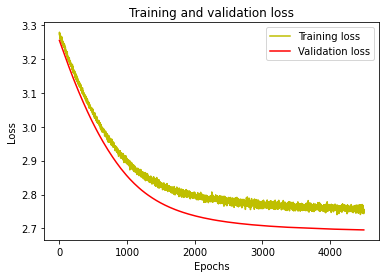

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
#plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
np.mean(prediction_test - y_test)**2

1.0991134815301432e-19

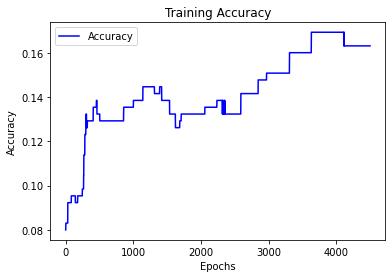

In [14]:
val_acc = history.history['val_accuracy']
epochs = range(1, len(val_acc) + 1)

plt.plot(epochs, val_acc, 'b', label = 'Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
val_acc

[0.00615384615957737,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01230769231915474,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.01846153847873211,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02153846062719822,
 0.02461538463830948,
 0.02461538463830948,
 0.02769230678677559,
 0.02769230678677559,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.03076923079788685,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04307692125439644,
 0.04923076927661896,
 0.04923076927661896,
 0.05538461357355118,
 0.05538461357355118,
 0.05538461357355118,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.05230769142508507,
 0.0523076